# PySINDy package

Using the PySINDy package on production data from Draugen.

In [1]:
import requests
import io
import matplotlib.dates as mdates
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/SanderSondeland/Master/main/20230418_WellBore_monthlyFacility%20(1).csv?token=GHSAT0AAAAAACD4GTTLLQ6GOKYVKBIVLCMWZEJQAOQ'
download = requests.get(url).content
data = pd.read_csv(io.StringIO(download.decode('utf-8')))
data

,name,npdId,field,year,month,operationTime,operationTimeUom,wellStatus,oil,oilUom,gas,gasUom,condensate,condensateUom,water,waterUom
0,6407/9-A-1,2254,DRAUGEN,1994,6,NaN,d,NaN,172347,Sm3,7931000,Sm3,NaN,Sm3,0,Sm3
1,6407/9-A-1,2254,DRAUGEN,1994,7,NaN,d,NaN,198022,Sm3,10221000,Sm3,NaN,Sm3,0,Sm3
2,6407/9-A-1,2254,DRAUGEN,1994,8,NaN,d,NaN,201457,Sm3,11584000,Sm3,NaN,Sm3,0,Sm3
3,6407/9-A-1,2254,DRAUGEN,1994,9,NaN,d,NaN,197711,Sm3,11087000,Sm3,NaN,Sm3,0,Sm3
4,6407/9-A-1,2254,DRAUGEN,1994,10,NaN,d,NaN,195050,Sm3,10988000,Sm3,NaN,Sm3,0,Sm3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3700,6407/9-G-5 H,7715,DRAUGEN,2020,8,31.00,d,producing,8851,Sm3,304029,Sm3,NaN,Sm3,66253,Sm3
3701,6407/9-G-5 H,7715,DRAUGEN,2020,9,28.93,d,producing,8493,Sm3,270559,Sm3,NaN,Sm3,66175,Sm3
3702,6407/9-G-5 H,7715,DRAUGEN,2020,10,25.54,d,producing,7268,Sm3,245919,Sm3,NaN,Sm3,62792,Sm3
3703,6407/9-G-5 H,7715,DRAUGEN,2020,11,30.00,d,producing,8109,Sm3,257430,Sm3,NaN,Sm3,73987,Sm3


In [3]:
data1 = data.drop(columns=['npdId', 'field', 'operationTime', 'operationTimeUom','wellStatus','oilUom', 'gasUom', 'condensate',
'condensateUom', 'water', 'waterUom'])
data1

,name,year,month,oil,gas
0,6407/9-A-1,1994,6,172347,7931000
1,6407/9-A-1,1994,7,198022,10221000
2,6407/9-A-1,1994,8,201457,11584000
3,6407/9-A-1,1994,9,197711,11087000
4,6407/9-A-1,1994,10,195050,10988000
...,...,...,...,...,...
3700,6407/9-G-5 H,2020,8,8851,304029
3701,6407/9-G-5 H,2020,9,8493,270559
3702,6407/9-G-5 H,2020,10,7268,245919
3703,6407/9-G-5 H,2020,11,8109,257430


In [4]:
x_data = data1[data1['name'] == '6407/9-A-1']
x_data.loc[:, 'period'] = x_data['year'].astype(str) + '-' + x_data['month'].astype(str)
x_data.loc[:, 'tot_prod'] = (x_data['oil'] + x_data['gas']/1000).round(1)
x_data = x_data.groupby('period').sum()
x_data

C:\Users\sande\AppData\Local\Temp\ipykernel_4760\3989910507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data.loc[:, 'period'] = x_data['year'].astype(str) + '-' + x_data['month'].astype(str)
C:\Users\sande\AppData\Local\Temp\ipykernel_4760\3989910507.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data.loc[:, 'tot_prod'] = (x_data['oil'] + x_data['gas']/1000).round(1)


,year,month,oil,gas,tot_prod
period,,,,,
1994-10,1994,10,195050,10988000,206038.0
1994-11,1994,11,196044,10255000,206299.0
1994-12,1994,12,176032,9252000,185284.0
1994-6,1994,6,172347,7931000,180278.0
1994-7,1994,7,198022,10221000,208243.0
...,...,...,...,...,...
2020-5,2020,5,6446,420354,6866.4
2020-6,2020,6,4180,279594,4459.6
2020-7,2020,7,2172,143060,2315.1


In [5]:
y_data = data1[data1['name'] == '6407/9-A-2 A']
y_data.loc[:, 'period'] = y_data['year'].astype(str) + '-' + y_data['month'].astype(str)
y_data.loc[:, 'tot_prod'] = (y_data['oil'] + y_data['gas']/1000).round(1)
y_data.groupby('period').sum()
y_data

C:\Users\sande\AppData\Local\Temp\ipykernel_4760\4226326607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_data.loc[:, 'period'] = y_data['year'].astype(str) + '-' + y_data['month'].astype(str)
C:\Users\sande\AppData\Local\Temp\ipykernel_4760\4226326607.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_data.loc[:, 'tot_prod'] = (y_data['oil'] + y_data['gas']/1000).round(1)


,name,year,month,oil,gas,period,tot_prod
318,6407/9-A-2 A,1994,12,72310,3802000,1994-12,76112.0
319,6407/9-A-2 A,1995,1,107169,5585000,1995-1,112754.0
320,6407/9-A-2 A,1995,2,137400,7487000,1995-2,144887.0
321,6407/9-A-2 A,1995,3,128699,7202000,1995-3,135901.0
322,6407/9-A-2 A,1995,4,142063,7908000,1995-4,149971.0
...,...,...,...,...,...,...,...
625,6407/9-A-2 A,2020,8,5055,287806,2020-8,5342.8
626,6407/9-A-2 A,2020,9,6422,336610,2020-9,6758.6
627,6407/9-A-2 A,2020,10,6954,381451,2020-10,7335.5
628,6407/9-A-2 A,2020,11,6040,315625,2020-11,6355.6


In [6]:
z_data = data1[data1['name'] == '6407/9-A-6']
z_data.loc[:, 'period'] = z_data['year'].astype(str) + '-' + z_data['month'].astype(str)
z_data.loc[:, 'tot_prod'] = (z_data['oil'] + z_data['gas']/1000).round(1)
z_data.groupby('period').sum()
z_data

C:\Users\sande\AppData\Local\Temp\ipykernel_4760\2187305751.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z_data.loc[:, 'period'] = z_data['year'].astype(str) + '-' + z_data['month'].astype(str)
C:\Users\sande\AppData\Local\Temp\ipykernel_4760\2187305751.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z_data.loc[:, 'tot_prod'] = (z_data['oil'] + z_data['gas']/1000).round(1)


,name,year,month,oil,gas,period,tot_prod
1897,6407/9-A-6,1994,8,206901,11608000,1994-8,218509.0
1898,6407/9-A-6,1994,9,215894,12106000,1994-9,228000.0
1899,6407/9-A-6,1994,10,221972,12504000,1994-10,234476.0
1900,6407/9-A-6,1994,11,211153,11045000,1994-11,222198.0
1901,6407/9-A-6,1994,12,220564,11594000,1994-12,232158.0
...,...,...,...,...,...,...,...
2208,6407/9-A-6,2020,8,14463,815989,2020-8,15279.0
2209,6407/9-A-6,2020,9,15132,791996,2020-9,15924.0
2210,6407/9-A-6,2020,10,15493,2185778,2020-10,17678.8
2211,6407/9-A-6,2020,11,13065,2184933,2020-11,15249.9


In [7]:
import datetime
dates = [datetime.datetime(year=int(year), month=int(month), day=1) for year in range(1994, 2021) for month in range(1, 13)]
dates = dates[11:-3]

In [8]:
test_x = x_data[8:]
tot_prod_x = test_x['tot_prod']

test_y = y_data[:-2]
tot_prod_y = test_y['tot_prod']

test_z = z_data[4:-2]
tot_prod_z = test_z['tot_prod']

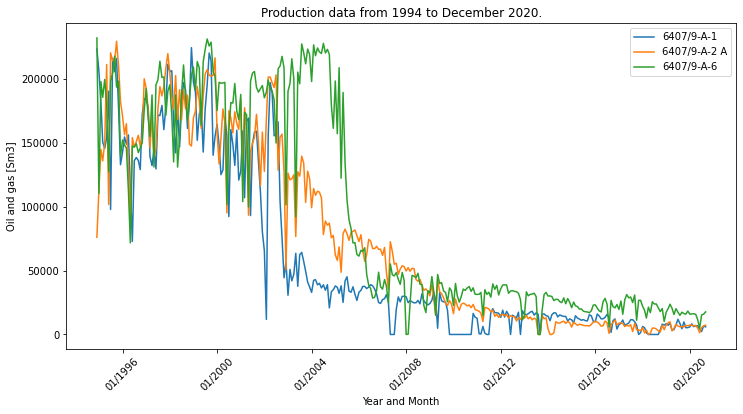

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dates, tot_prod_x, label='6407/9-A-1')
ax.plot(dates, tot_prod_y, label='6407/9-A-2 A')
ax.plot(dates, tot_prod_z, label='6407/9-A-6')

date_fmt = mdates.DateFormatter('%m/%Y')
ax.xaxis.set_major_formatter(date_fmt)
plt.xticks(rotation=45)

# Set plot title and axis labels
plt.title('Production data from 1994 to December 2020.')
plt.legend()
plt.xlabel('Year and Month')
plt.ylabel('Oil and gas [Sm3]')

plt.show()

# Filtering 

In [10]:
from scipy.ndimage import median_filter
import numpy as np

In [11]:
md_x = median_filter(tot_prod_x, size=4)

md_y = median_filter(tot_prod_y, size=4)

md_z = median_filter(tot_prod_z, size=4)

In [12]:
i = len(dates)
t = list(range(1, i+1))
t_np = np.array(t)

In [13]:
md_x_np = np.array(md_x)
md_y_np = np.array(md_y)
md_z_np = np.array(md_z)

tot_prod_x_np = np.array(tot_prod_x)
tot_prod_y_np = np.array(tot_prod_y)
tot_prod_z_np = np.array(tot_prod_z)

# PySINDy



In [14]:
import logging
import pysindy as ps
from scipy.integrate import odeint
from pysindy.differentiation import FiniteDifference, SINDyDerivative, SmoothedFiniteDifference
from pysindy.optimizers import STLSQ

In [15]:
mat = np.zeros((310,3))

mat[:, 0] = md_x
mat[:, 1] = md_y
mat[:, 2] = md_z

i = len(dates)
t = list(range(1, i+1))
t_np = np.array(t)

In [16]:
Threshold = 0.005
Max_iterations = 10

In [17]:
def fit(u: np.ndarray, t: np.ndarray) -> ps.SINDy:
    """Uses PySINDy to find the equation that best fits the data u.
    """
    optimizer = STLSQ(threshold=Threshold, max_iter=Max_iterations)

    # Finite difference derivatives.
    differentiation_method = FiniteDifference()
    differentiation_method2 = SmoothedFiniteDifference()

    model = ps.SINDy(optimizer=optimizer,
                     differentiation_method=differentiation_method2,
                     feature_names=["x", "y", "z"],
                     discrete_time=False)
    model.fit(u, t=t)
    model.print()

    return model

In [18]:
def compute_trajectory(u0: np.ndarray, model: ps.SINDy) -> np.ndarray:
    """Calculates the trajectory using the model discovered by SINDy.
    """
    t0 = 0
    dt = 1
    tmax = 310
    n = int(tmax / dt + 1)
    t_eval = np.linspace(start=t0, stop=tmax, num=n)

    u_approximation = model.simulate(u0, t_eval)

    return u_approximation

In [19]:
model = fit(mat, t_np)

(x)' = 115.442 1 + -0.045 x + 0.076 y + -0.041 z
(y)' = -255.021 1 + 0.028 x + -0.024 y
(z)' = -396.834 1 + -0.015 x + 0.039 y + -0.025 z


In [20]:
u0 = mat[0]
u_approximation = compute_trajectory(u0, model)

In [21]:
x_aprox = u_approximation[:,0]
y_aprox = u_approximation[:,1]
z_aprox = u_approximation[:,2]

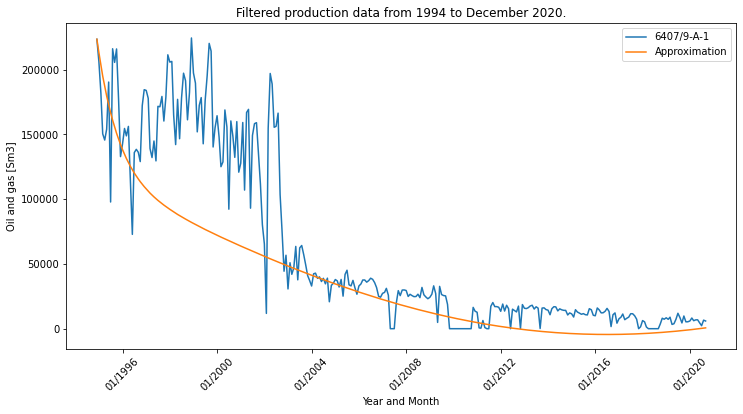

In [22]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dates, tot_prod_x, label='6407/9-A-1')
ax.plot(dates, x_aprox[:-1], label='Approximation')


date_fmt = mdates.DateFormatter('%m/%Y')
ax.xaxis.set_major_formatter(date_fmt)
plt.xticks(rotation=45)

# Set plot title and axis labels
plt.title('Filtered production data from 1994 to December 2020.')
plt.legend()
plt.xlabel('Year and Month')
plt.ylabel('Oil and gas [Sm3]')

plt.show()

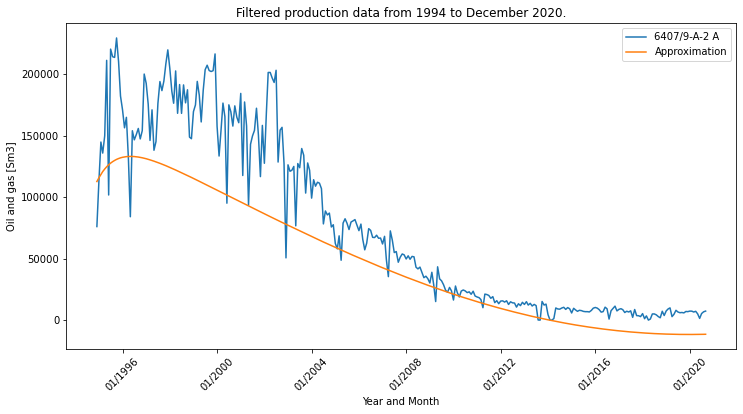

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dates, tot_prod_y, label='6407/9-A-2 A')
ax.plot(dates, y_aprox[:-1], label='Approximation')


date_fmt = mdates.DateFormatter('%m/%Y')
ax.xaxis.set_major_formatter(date_fmt)
plt.xticks(rotation=45)

# Set plot title and axis labels
plt.title('Filtered production data from 1994 to December 2020.')
plt.legend()
plt.xlabel('Year and Month')
plt.ylabel('Oil and gas [Sm3]')

plt.show()

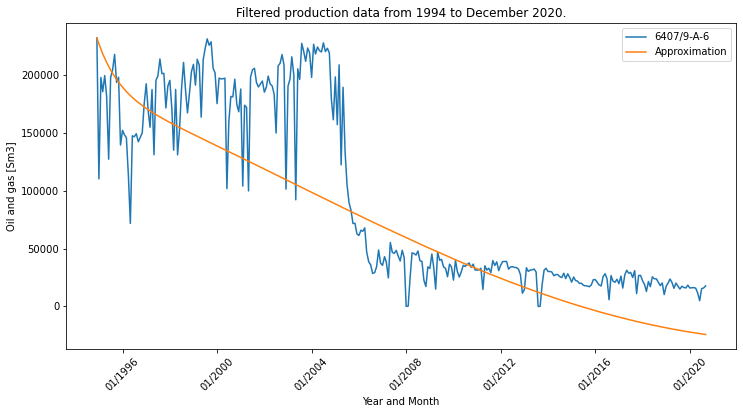

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dates, tot_prod_z, label='6407/9-A-6')
ax.plot(dates, z_aprox[:-1], label='Approximation')


date_fmt = mdates.DateFormatter('%m/%Y')
ax.xaxis.set_major_formatter(date_fmt)
plt.xticks(rotation=45)

# Set plot title and axis labels
plt.title('Filtered production data from 1994 to December 2020.')
plt.legend()
plt.xlabel('Year and Month')
plt.ylabel('Oil and gas [Sm3]')

plt.show()